In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop('Id',axis=1,inplace=True)

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [6]:
df_scaled = pd.DataFrame(mms.fit_transform(df.drop('Species',axis=1)),columns=mms.get_feature_names_out())
df_scaled

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df.iloc[:,4:], test_size=0.20, random_state=20)

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

C:\Users\siddharth\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [9]:
y_pred = gnb.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_pred,y_test)

<Axes: >

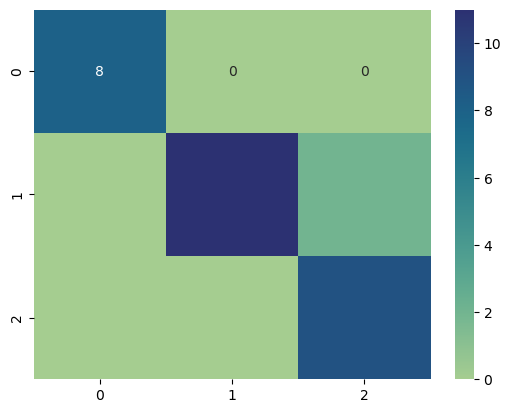

In [11]:
import seaborn as sns
sns.heatmap(conf,annot=True,cmap='crest')

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [20]:
FP = conf.sum(axis=0) - np.diag(conf)  
FN = conf.sum(axis=1) - np.diag(conf)
TP = np.diag(conf)
TN = conf.sum() - (FP + FN + TP)
TN

array([22, 17, 19], dtype=int64)